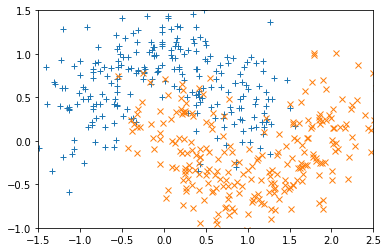

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

x, y = make_moons(n_samples=500, noise=0.30, random_state=42)

plt.figure()
plt.plot(x[:, 0][y==0], x[:, 1][y==0], '+')
plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'x')
plt.axis([-1.5, 2.5, -1, 1.5])
plt.show()

In [2]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

NUM_CLASSES = 2

y_one_hot = to_categorical(y, NUM_CLASSES)
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, random_state=42)

print("x_train.shape = {}, y_train.shape = {}".format(x_train.shape, y_train.shape))
print("x_test.shape = {}, y_test.shape = {}".format(x_test.shape, y_test.shape))

Using TensorFlow backend.


x_train.shape = (375, 2), y_train.shape = (375, 2)
x_test.shape = (125, 2), y_test.shape = (125, 2)


In [3]:
INPUT_SHAPE = (2, )

BATCH_SIZE = 64
EPOCHS = 10

## Use built-in loss function

In [4]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

inputs = Input(shape=INPUT_SHAPE)
x = Dense(128, activation='relu')(inputs)
predications = Dense(NUM_CLASSES, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predications)
model.compile(loss=categorical_crossentropy,optimizer=Adadelta(), metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                    verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 375 samples, validate on 125 samples
Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6977 - acc: 0.4187 - val_loss: 0.6744 - val_acc: 0.7440
Epoch 2/10
375/375 [==============================] - 0s 61us/step - loss: 0.6613 - acc: 0.7493 - val_loss: 0.6380 - val_acc: 0.7760
Epoch 3/10
375/375 [==============================] - 0s 61us/step - loss: 0.6249 - acc: 0.7733 - val_loss: 0.5996 - val_acc: 0.7920
Epoch 4/10
375/375 [==============================] - 0s 53us/step - loss: 0.5866 - acc: 0.7893 - val_loss: 0.5581 - val_acc: 0.8160
Epoch 5/10
375/375 [==============================] - 0s 64us/step - loss: 0.5450 - acc: 0.7947 - val_loss: 0.5145 - val_acc: 0.8240
Epoch 6/10
375/375 [==============================] - 0s 61us/step - loss: 0.5025 - acc: 0.7920 - val_loss: 0.4705 - val_acc: 0.8320
Epoch 7/10
375/375 [==============================] - 0s 61us/step - loss: 0.4617 - acc: 0.8080 - val_loss: 0

In [6]:
loss, acc= model.evaluate(x_test, y_test)
print("loss = {}, acc = {}".format(loss, acc))

125/125 [==============================] - 0s 56us/step
loss = 0.3632161581516266, acc = 0.840000006198883


## Custom loss function

In [7]:
import numpy as np

y = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])
y_hat = np.array([[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

y_sum = np.sum(y_hat, axis=1, keepdims=True)
print("y_sum = \n{}".format(y_sum))

y_scale  = y_hat / y_sum
print("y_scale = \n{}".format(y_scale))

y_log = np.log(y_scale)
print("y_log = \n{}".format(y_log))

cross_entropy = -np.sum(y * y_log) / y.shape[0]
print("cross_entropy = \n{}".format(cross_entropy))

y_sum = 
[[1.]
 [1.]
 [1.]
 [1.]]
y_scale = 
[[0.1  0.9 ]
 [0.9  0.1 ]
 [0.8  0.2 ]
 [0.35 0.65]]
y_log = 
[[-2.30258509 -0.10536052]
 [-0.10536052 -2.30258509]
 [-0.22314355 -1.60943791]
 [-1.04982212 -0.43078292]]
cross_entropy = 
0.21616187468057912


In [8]:
from sklearn.metrics import log_loss

log_loss(np.argmax(y, axis=1),  [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

In [9]:
import keras.backend as K

y = K.constant([[0, 1], [1, 0], [1, 0], [0, 1]], dtype='float64')
y_hat = K.constant([[.1, .9], [.9, .1], [.8, .2], [.35, .65]],  dtype='float64')

y_sum = K.sum(y_hat, axis=1, keepdims=True)
print("y_sum = \n{}".format(K.eval(y_sum)))

y_scale  = y_hat / y_sum
print("y_scale = \n{}".format(K.eval(y_scale)))

y_log = K.log(y_scale)
print("y_log = \n{}".format(K.eval(y_log)))

cross_entropy = -K.sum(y * y_log) / K.cast(K.shape(y)[0], 'float64')
print("cross_entropy = {}".format(K.eval(cross_entropy)))

y_sum = 
[[1.]
 [1.]
 [1.]
 [1.]]
y_scale = 
[[0.1  0.9 ]
 [0.9  0.1 ]
 [0.8  0.2 ]
 [0.35 0.65]]
y_log = 
[[-2.30258509 -0.10536052]
 [-0.10536052 -2.30258509]
 [-0.22314355 -1.60943791]
 [-1.04982212 -0.43078292]]
cross_entropy = 0.21616187468057912


In [10]:
import keras.backend as K

def custom_loss(y, y_hat):
    y_hat = y_hat / K.sum(y_hat, 1, True)
    return -K.sum(y * K.log(y_hat)) / K.cast(K.shape(y)[0], 'float32')

In [11]:
inputs = Input(shape=INPUT_SHAPE)
x = Dense(128, activation='relu')(inputs)
predications = Dense(NUM_CLASSES, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predications)
model.compile(loss=custom_loss, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                    verbose=1, validation_data=(x_test, y_test))

Train on 375 samples, validate on 125 samples
Epoch 1/10
375/375 [==============================] - 0s 664us/step - loss: 0.6504 - acc: 0.7573 - val_loss: 0.6279 - val_acc: 0.7920
Epoch 2/10
375/375 [==============================] - 0s 56us/step - loss: 0.6198 - acc: 0.7707 - val_loss: 0.5977 - val_acc: 0.8240
Epoch 3/10
375/375 [==============================] - 0s 56us/step - loss: 0.5882 - acc: 0.7973 - val_loss: 0.5654 - val_acc: 0.8320
Epoch 4/10
375/375 [==============================] - 0s 56us/step - loss: 0.5554 - acc: 0.8000 - val_loss: 0.5314 - val_acc: 0.8320
Epoch 5/10
375/375 [==============================] - 0s 56us/step - loss: 0.5207 - acc: 0.8027 - val_loss: 0.4956 - val_acc: 0.8320
Epoch 6/10
375/375 [==============================] - 0s 53us/step - loss: 0.4855 - acc: 0.8187 - val_loss: 0.4607 - val_acc: 0.8320
Epoch 7/10
375/375 [==============================] - 0s 53us/step - loss: 0.4517 - acc: 0.8240 - val_loss: 0.4280 - val_acc: 0.8400
Epoch 8/10
375/375 [==

In [13]:
loss, acc= model.evaluate(x_test, y_test)
print("loss = {}, acc = {}".format(loss, acc))

125/125 [==============================] - 0s 56us/step
loss = 0.36641453886032105, acc = 0.840000006198883
